## Dummy dataframe

For this project I need to create a dummy csv file that has a dataframe. It will consist of about 1000 rows and will contain relevant data and data with errors. This is because I need my parquet conversion program to clean the data before converting it to a parquet file 

In [134]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [135]:
# setting random seed to 42 for consistence with random generated numbers
np.random.seed(42) 

In [136]:
# creating a dataframe with 1000 rows
df = pd.DataFrame(index=range(1000))

# Adding a Unix datetime column with one second increments
start_time = int(time.mktime(time.strptime("2023-01-31 00:00:00", "%Y-%m-%d %H:%M:%S")))

df["Timestamp"] = pd.to_numeric(range(start_time, start_time + 1000))

# added this data to reference the datetime for future columns. 
#df["Date_time"] = pd.to_datetime(df["Timestamp"], unit="s")

df.head()


,Timestamp
0,1675119600
1,1675119601
2,1675119602
3,1675119603
4,1675119604


In [137]:
def generate_dict_numbers(high, low, decimal):

    result_dict = {}

    for i in range(1,11):
        if i % 2 == 0:
                result_dict[str(i)] = np.round(np.random.uniform(low=high/2, high=high),decimals=decimal)
        else:
             result_dict[str(i)] = np.round(np.random.uniform(low=low, high=high/2),decimals=decimal)

    return result_dict

In [138]:
speed_over_ground_dict = generate_dict_numbers(19,0,2)
print(speed_over_ground_dict)

{'1': 3.56, '2': 18.53, '3': 6.95, '4': 15.19, '5': 1.48, '6': 10.98, '7': 0.55, '8': 17.73, '9': 5.71, '10': 16.23}


In [139]:

def add_interpolate_points_and_cols(column,dict):
    df[column] = np.nan
    df.at[0, column] = dict["1"]
    df.at[199, column] = dict["2"]
    df.at[200,column] = dict["3"]
    df.at[399,column] = dict["4"]
    df.at[400, column] = dict["5"]
    df.at[599, column] = dict["6"]
    df.at[600,column] = dict["7"]
    df.at[799,column] = dict["8"]
    df.at[800,column] = dict["9"]
    df.at[999,column] = dict["10"]

### Speed column

In [140]:
add_interpolate_points_and_cols("speed_over_ground", speed_over_ground_dict)


In [141]:
df.loc[:200]

,Timestamp,speed_over_ground
0,1675119600,3.56
1,1675119601,NaN
2,1675119602,NaN
3,1675119603,NaN
4,1675119604,NaN
...,...,...
196,1675119796,NaN
197,1675119797,NaN
198,1675119798,NaN
199,1675119799,18.53


In [168]:
random_fluctuations = np.random.uniform(low=-0.5, high=0.5,size=len(df))

df.speed_over_ground = (df.speed_over_ground.interpolate(method="linear") + random_fluctuations).round(2)
df.loc[0:200]

,Timestamp,speed_over_ground,Longitude,Latitude,engine_fuel_rate
0,1675119600,3.56,-119.605257,0.545601,6.16
1,1675119601,3.84,-119.511826,0.576778,8.14
2,1675119602,3.51,-119.418386,0.607962,7.94
3,1675119603,3.60,-119.324955,0.639144,6.78
4,1675119604,3.34,-119.231512,0.670333,6.78
...,...,...,...,...,...
196,1675119796,17.77,101.652173,39.837367,35.14
197,1675119797,18.49,103.147158,40.086838,36.40
198,1675119798,17.75,104.642138,40.336312,35.24
199,1675119799,17.50,106.137119,40.585784,35.70


Text(0.5, 1.0, 'speed_over_ground')

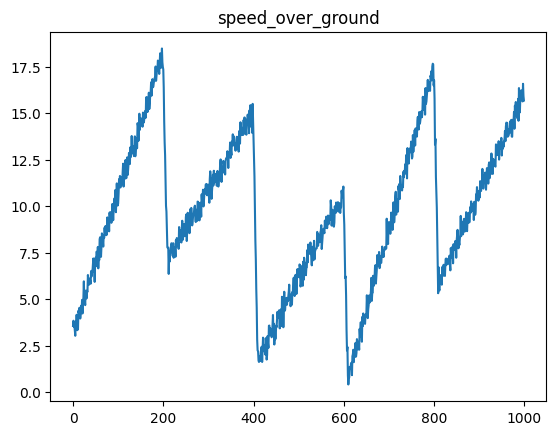

In [169]:
plt.plot(df["speed_over_ground"])
plt.title("speed_over_ground")

### Longitude column

In [144]:
longitude_dict = generate_dict_numbers(179,-179, 6) 
print(longitude_dict)

{'1': -119.605265, '2': 177.896287, '3': 74.479933, '4': 93.0287, '5': 10.446934, '6': 172.309724, '7': -130.51552, '8': 140.331098, '9': 66.808608, '10': 92.538165}


In [145]:
add_interpolate_points_and_cols("Longitude", longitude_dict)
df.loc[:200]

,Timestamp,speed_over_ground,Longitude
0,1675119600,3.08,-119.605265
1,1675119601,4.07,NaN
2,1675119602,3.97,NaN
3,1675119603,3.39,NaN
4,1675119604,3.39,NaN
...,...,...,...
196,1675119796,17.57,NaN
197,1675119797,18.20,NaN
198,1675119798,17.62,NaN
199,1675119799,17.85,177.896287


In [163]:
#random_fluctuations = np.random.uniform(low=-0.5, high=0.5,size=len(df))

fluctuations = np.random.uniform(low=-0.000005, high=0.000005,size=len(df))
df.Longitude = (df.Longitude.interpolate(method="linear").rolling(window=40, min_periods=1).mean() + fluctuations).round(6)
df.loc[:200]

,Timestamp,speed_over_ground,Longitude,Latitude
0,1675119600,3.08,-119.605257,0.545601
1,1675119601,4.07,-119.511826,0.576778
2,1675119602,3.97,-119.418386,0.607962
3,1675119603,3.39,-119.324955,0.639144
4,1675119604,3.39,-119.231512,0.670333
...,...,...,...,...
196,1675119796,17.57,101.652173,39.837367
197,1675119797,18.20,103.147158,40.086838
198,1675119798,17.62,104.642138,40.336312
199,1675119799,17.85,106.137119,40.585784


Text(0.5, 1.0, 'Longitude')

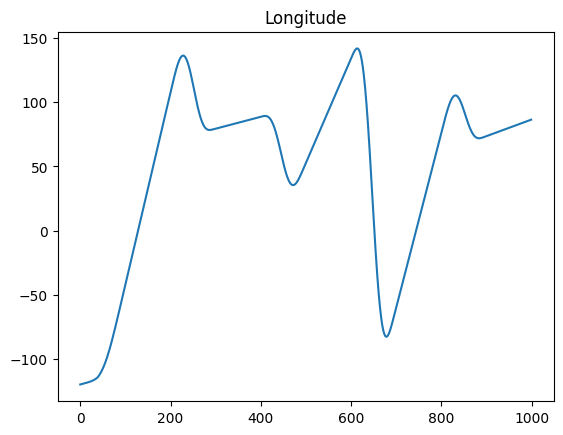

In [164]:
plt.plot(df["Longitude"])
plt.title("Longitude")

### Latitude

In [154]:
latitude_dict = generate_dict_numbers(79,-79, 6)
print(latitude_dict)

{'1': 0.545593, '2': 50.190436, '3': -69.374288, '4': 78.706981, '5': -60.490121, '6': 78.542629, '7': 36.807672, '8': 70.855815, '9': -0.858379, '10': 62.323378}


In [157]:
add_interpolate_points_and_cols("Latitude", latitude_dict)
df.head()

,Timestamp,speed_over_ground,Longitude,Latitude
0,1675119600,3.08,-119.605260,0.545593
1,1675119601,4.07,-119.418389,NaN
2,1675119602,3.97,-119.231513,NaN
3,1675119603,3.39,-119.044645,NaN
4,1675119604,3.39,-118.857775,NaN


In [161]:
fluctuations = np.random.uniform(low=-0.000005, high=0.000005,size=len(df))
df.Latitude = (df.Latitude.interpolate(method="linear").rolling(window=40, min_periods=1).mean() + fluctuations).round(6)
df.loc[:200]

,Timestamp,speed_over_ground,Longitude,Latitude
0,1675119600,3.08,-119.605260,0.545601
1,1675119601,4.07,-119.418389,0.576778
2,1675119602,3.97,-119.231513,0.607962
3,1675119603,3.39,-119.044645,0.639144
4,1675119604,3.39,-118.857775,0.670333
...,...,...,...,...
196,1675119796,17.57,130.804330,39.837367
197,1675119797,18.20,132.299311,40.086838
198,1675119798,17.62,133.794301,40.336312
199,1675119799,17.85,135.289284,40.585784


Text(0.5, 1.0, 'Latitude')

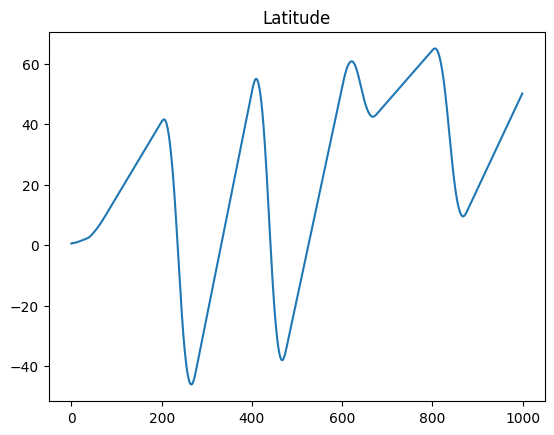

In [162]:
plt.plot(df["Latitude"])
plt.title("Latitude")

### Engine fuel rate

In [178]:
df["engine_fuel_rate"] = np.clip(df["speed_over_ground"]* 3, 0, 100)+ random_fluctuations.round(2)
df["engine_fuel_rate"].max()

55.76

Text(0.5, 1.0, 'Fuel rate')

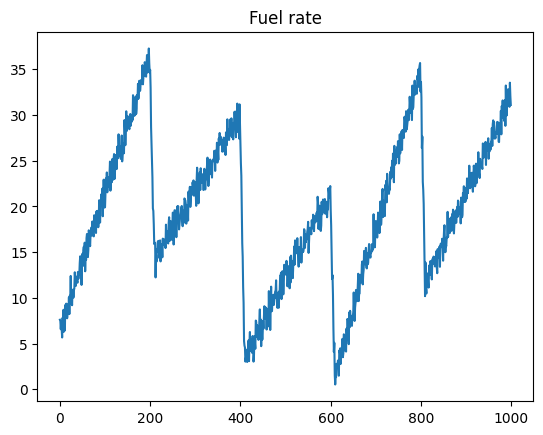

In [172]:
plt.plot(df["engine_fuel_rate"])
plt.title("Fuel rate")

The next stage after creating this data frame is to add some bad data. This can be done in a few ways. I should have values that are not applicable in certain ranges within the selected column. Also I will add nan values within in each colum so my next program can handle them. Below are some examples on what I will apply on each column.

- Time stamp:   
    - remove one or more number so there is less then 10 digits
    - add nan value
    - add 0 value
    - add string value

- speed_over_ground 
    - add string value
    - add minus value
    - add positive number over 20
    - add nan value


- Longitude and Latitude 
    - add string value
    - add minus values beyond the range of - 90 and -180
    - add positive values over 90 and 180
    - add string value
    - add nan value
  

- engine_fuel_rate 
    - add string value
    - add minus values 
    - add value over range of 100
    - add nan value
